In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
restaurant_df=pd.read_csv("Resources/CSV_file")

In [108]:
result_df=restaurant_df[["name","stars","price","cuisine"]]


In [109]:
rating = result_df["stars"].replace("star rating","", regex=True)

In [110]:
result_df["star rating"]=rating

In [111]:
price=result_df["price"].replace("$$", 2)
result_df["price"]=price


In [112]:
price_2=result_df["price"].replace("$",1)
result_df["price"]=price_2

In [113]:
price_3=result_df["price"].replace("$$$",3)
result_df["price"]=price_3

In [114]:
price_4=result_df["price"].replace("$$$$",4)
result_df["price"]=price_4

In [116]:
result_df['rating'] = result_df['star rating'].astype(float)

In [117]:
cuisine_saturation=result_df.groupby(["cuisine"]).count()["name"]
cuisine_df=pd.DataFrame({"number":cuisine_saturation})
cuisine_df_2=cuisine_df.sort_values("number", ascending= False)

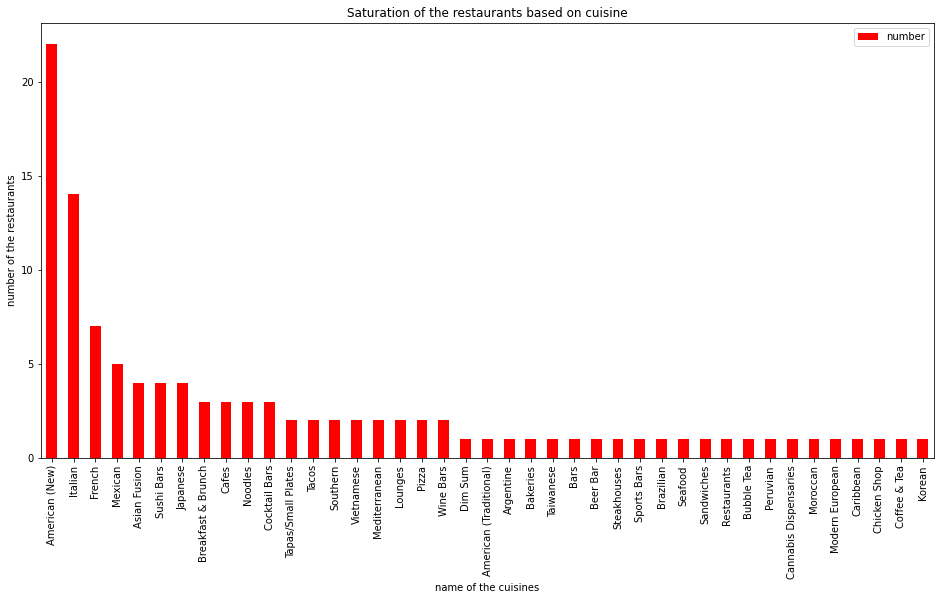

<Figure size 432x288 with 0 Axes>

In [121]:
cuisine_df_2.plot(kind="bar", 
                  figsize=(16,8), 
                  color = "red", 
                  xlabel="name of the cuisines",
                  ylabel="number of the restaurants",
                  title="Saturation of the restaurants based on cuisine")
plt.show()
plt.savefig("Resources/cuisine_saturation.png")


In [129]:
price=result_df.groupby(["cuisine"]).mean()["price"].round(0)
price_df=pd.DataFrame({"Average Price":price})
price_df_2=price_df.sort_values("Average Price", ascending= False).dropna()

In [130]:
price_df_2

,Average Price
cuisine,
Argentine,3.0
Modern European,3.0
Bakeries,3.0
Peruvian,3.0
Sushi Bars,3.0
Pizza,3.0
Mediterranean,3.0
Southern,3.0
Seafood,3.0
